In [1]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from mtcnn import MTCNN
import imutils
from imutils import face_utils
import matplotlib.pyplot as plt
import numpy as np
import cv2
detector = MTCNN()

In [2]:
class FaceAligner:
    #modify the box size with changing the values for desiredLeftEye
    def __init__(self, desiredLeftEye=(0.30, 0.30),
        desiredFaceWidth=224, desiredFaceHeight=None):
        # store the facial landmark predictor, desired output left
        # eye position, and desired output face width + height
        self.desiredLeftEye = desiredLeftEye
        self.desiredFaceWidth = desiredFaceWidth
        self.desiredFaceHeight = desiredFaceHeight
        # if the desired face height is None, set it to be the
        # desired face width (normal behavior)
        if self.desiredFaceHeight is None:
            self.desiredFaceHeight = self.desiredFaceWidth
    def align(self, image, left_eye, right_eye):
        
        # compute the angle between the eye centroids
        dY = right_eye[1] - left_eye[1]
        dX = right_eye[0] - left_eye[0]
        angle = np.degrees(np.arctan2(dY, dX))
        
        #compute the desired right eye x-coordinate based on the
        # desired x-coordinate of the left eye
        desiredRightEyeX = 1.0 - self.desiredLeftEye[0]
        
        # determine the scale of the new resulting image by taking
        # the ratio of the distance between eyes in the *current*
        # image to the ratio of distance between eyes in the
        # *desired* image
        dist = np.sqrt((dX ** 2) + (dY ** 2))
        desiredDist = (desiredRightEyeX - self.desiredLeftEye[0])
        desiredDist *= self.desiredFaceWidth
        scale = desiredDist / dist
        
        # compute center (x, y)-coordinates (i.e., the median point)
        # between the two eyes in the input image
        eyesCenter = (int((left_eye[0] + right_eye[0]) // 2),
                      int((left_eye[1] + right_eye[1]) // 2))
        # grab the rotation matrix for rotating and scaling the face
        #print(eyesCenter,angle,scale)
        M = cv2.getRotationMatrix2D(eyesCenter, angle, scale)
        # update the translation component of the matrix
        tX = self.desiredFaceWidth * 0.5
        tY = self.desiredFaceHeight * self.desiredLeftEye[1]
        M[0, 2] += (tX - eyesCenter[0])
        M[1, 2] += (tY - eyesCenter[1])
        
        # apply the affine transformation
        (w, h) = (self.desiredFaceWidth, self.desiredFaceHeight)
        output = cv2.warpAffine(image, M, (w, h),flags=cv2.INTER_CUBIC)
        # return the aligned face
        return output

In [3]:
def detect_face(img):
    pixels = pyplot.imread(img)
    
    faces = detector.detect_faces(pixels)
    #print(faces)
    return faces

In [4]:
img = 'test_align3.jpg'

Original face


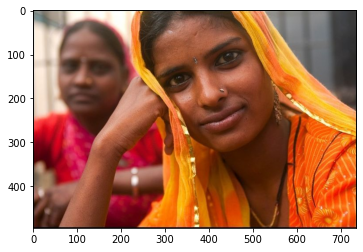

1/1 [==============================] - 1s 512ms/step
Aligned face: 1, Accuracy: 99.997


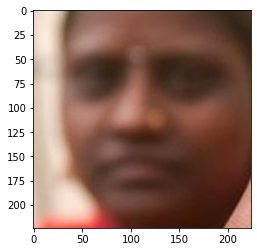

Aligned face: 2, Accuracy: 99.995


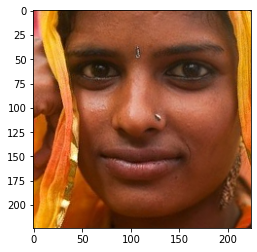

In [5]:
fa = FaceAligner(desiredFaceWidth=224)
original_img= cv2.imread(img)
print("Original face")
plt.imshow(original_img[:, :, ::-1])
plt.show()

faces = detect_face(img)

if len(faces)>0:
      i=0
      #print(faces)
      for face in faces:
            aligned_img = fa.align(cv2.imread(img), face['keypoints']['left_eye'], face['keypoints']['right_eye'])
            
            print("Aligned face: {}, Accuracy: {:.3f}".format(i+1, face['confidence']*100))
            plt.imshow(aligned_img[:, :, ::-1])
            plt.show()
            i+=1